# app.py — run with: streamlit run app.py
import streamlit as st
import pandas as pd
from pyDOE2 import lhs

st.title("DOE-in-a-Box")
factors = st.slider("Factors", 2, 6, 3)
runs = st.number_input("Runs", 6, 30p, 12)

if st.button("Generate Design"):
    doe = lhs(factors, runs)
    df = pd.DataFrame(doe.round(3), columns=[f"F{i+1}" for i in range(factors)])
    st.dataframe(df)
    st.download_button("Download", df.to_csv(index=False), "doe.csv")

In [8]:
import pandas as pd

# Use raw string (r"") to avoid escape character issues
df = pd.read_csv(r"C:\Users\srsch\OneDrive\Desktop\red blend doe fun.csv")

# Preview the data
print(df.head(17))




    Cab %  Merlot %  Zin %  Sulfur Target  L   a   b
0    30.0        20   50.0             30  56  10 -4
1    70.0        20   10.0             70  64  12 -4
2    30.0        60   10.0             70  57  12 -4
3    46.7        40   13.3             30  49   8 -1
4    30.0        20   50.0             70  53   8  1
5    46.7        40   13.3             70  53  10 -2
6    55.0        25   20.0             50  55  11  0
7    40.0        35   25.0             40  53  11  0
8    60.0        20   20.0             60  63  13 -2
9    35.0        45   20.0             35  56  11  0
10   50.0        30   20.0             45  56  12 -2
11   42.0        38   20.0             55  59  12 -2
12   48.0        32   20.0             25  57  11 -4
13   38.0        42   20.0             65  65   8  3
14   52.0        28   20.0             40  55  12 -1
15   44.0        36   20.0             50  55  12 -1


In [10]:
# Check data types and missing values
print(df.info())
print(df.describe())

# Count unique values in categorical columns
print(df[''].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cab %          16 non-null     float64
 1   Merlot %       16 non-null     int64  
 2   Zin %          16 non-null     float64
 3   Sulfur Target  16 non-null     int64  
 4   L              16 non-null     int64  
 5   a              16 non-null     int64  
 6   b              16 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 1.0 KB
None
         Cab %   Merlot %      Zin %  Sulfur Target       L          a   \
count  16.0000  16.000000  16.000000      16.000000  16.0000  16.000000   
mean   44.8375  33.187500  21.975000      50.312500  56.6250  10.812500   
std    11.2468  11.148804  11.697208      15.965458   4.3031   1.600781   
min    30.0000  20.000000  10.000000      25.000000  49.0000   8.000000   
25%    37.2500  23.750000  18.325000      38.750000  54.5000  10.000000 

KeyError: ''

In [11]:
import pandas as pd

data = {
    "Cab_pct": [30.0,70.0,30.0,46.7,30.0,46.7,55.0,40.0,60.0,35.0,50.0,42.0,48.0,38.0,52.0,44.0],
    "Merlot_pct": [20,20,60,40,20,40,25,35,20,45,30,38,32,42,28,36],
    "Zin_pct": [50.0,10.0,10.0,13.3,50.0,13.3,20.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0],
    "Sulfur_Target": [30,70,70,30,70,70,50,40,60,35,45,55,25,65,40,50],
    "L": [56,64,57,49,53,53,55,53,63,56,56,59,57,65,55,55],
    "a": [10,12,12,8,8,10,11,11,13,11,12,12,11,8,12,12],
    "b": [-4,-4,-4,-1,1,-2,0,0,-2,0,-2,-2,-4,3,-1,-1]
}

df = pd.DataFrame(data)


In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# L response
model_L = ols('L ~ Cab_pct + Merlot_pct + Zin_pct + Sulfur_Target', data=df).fit()
anova_L = sm.stats.anova_lm(model_L, typ=2)
print("ANOVA for L:\n", anova_L)

# a response
model_a = ols('a ~ Cab_pct + Merlot_pct + Zin_pct + Sulfur_Target', data=df).fit()
anova_a = sm.stats.anova_lm(model_a, typ=2)
print("\nANOVA for a:\n", anova_a)

# b response
model_b = ols('b ~ Cab_pct + Merlot_pct + Zin_pct + Sulfur_Target', data=df).fit()
anova_b = sm.stats.anova_lm(model_b, typ=2)
print("\nANOVA for b:\n", anova_b)


ANOVA for L:
                     sum_sq    df          F    PR(>F)
Cab_pct        1307.378655   1.0  77.350032  0.000001
Merlot_pct      607.325509   1.0  35.931937  0.000063
Zin_pct         658.017642   1.0  38.931097  0.000043
Sulfur_Target    42.007302   1.0   2.485329  0.140896
Residual        202.825306  12.0        NaN       NaN

ANOVA for a:
                   sum_sq    df          F    PR(>F)
Cab_pct        81.172914   1.0  33.103058  0.000091
Merlot_pct     26.654737   1.0  10.870046  0.006376
Zin_pct        13.243167   1.0   5.400685  0.038491
Sulfur_Target   0.101549   1.0   0.041413  0.842154
Residual       29.425529  12.0        NaN       NaN

ANOVA for b:
                   sum_sq    df         F    PR(>F)
Cab_pct         8.764496   1.0  1.906363  0.192542
Merlot_pct      0.384842   1.0  0.083707  0.777273
Zin_pct         0.011255   1.0  0.002448  0.961353
Sulfur_Target   1.536272   1.0  0.334154  0.573911
Residual       55.169947  12.0       NaN       NaN


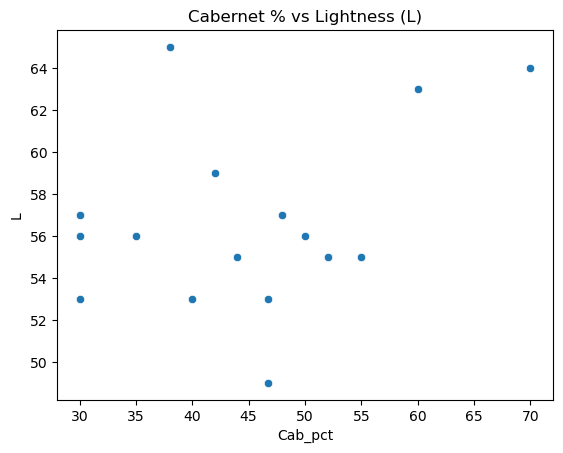

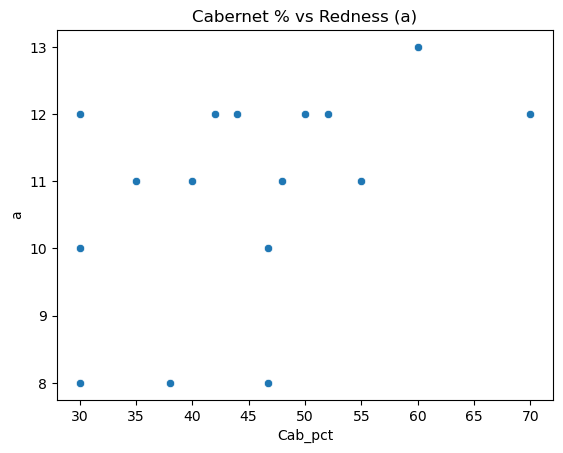

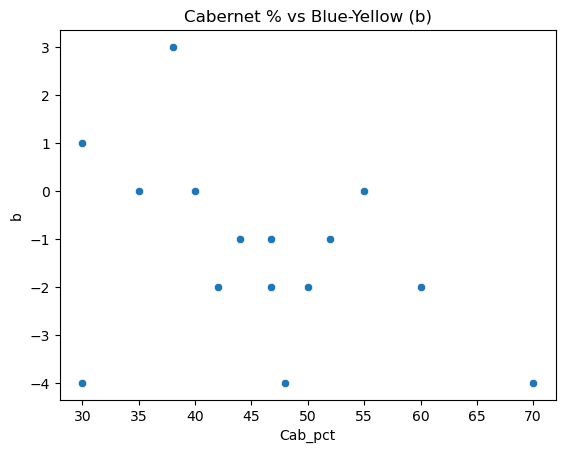

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cab % vs L
sns.scatterplot(data=df, x="Cab_pct", y="L")
plt.title("Cabernet % vs Lightness (L)")
plt.show()

# Cab % vs a
sns.scatterplot(data=df, x="Cab_pct", y="a")
plt.title("Cabernet % vs Redness (a)")
plt.show()

# Cab % vs b
sns.scatterplot(data=df, x="Cab_pct", y="b")
plt.title("Cabernet % vs Blue-Yellow (b)")
plt.show()


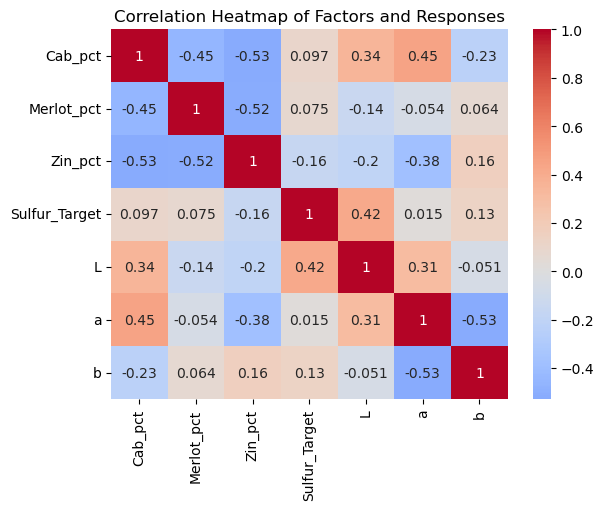

In [14]:
import numpy as np

corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Factors and Responses")
plt.show()


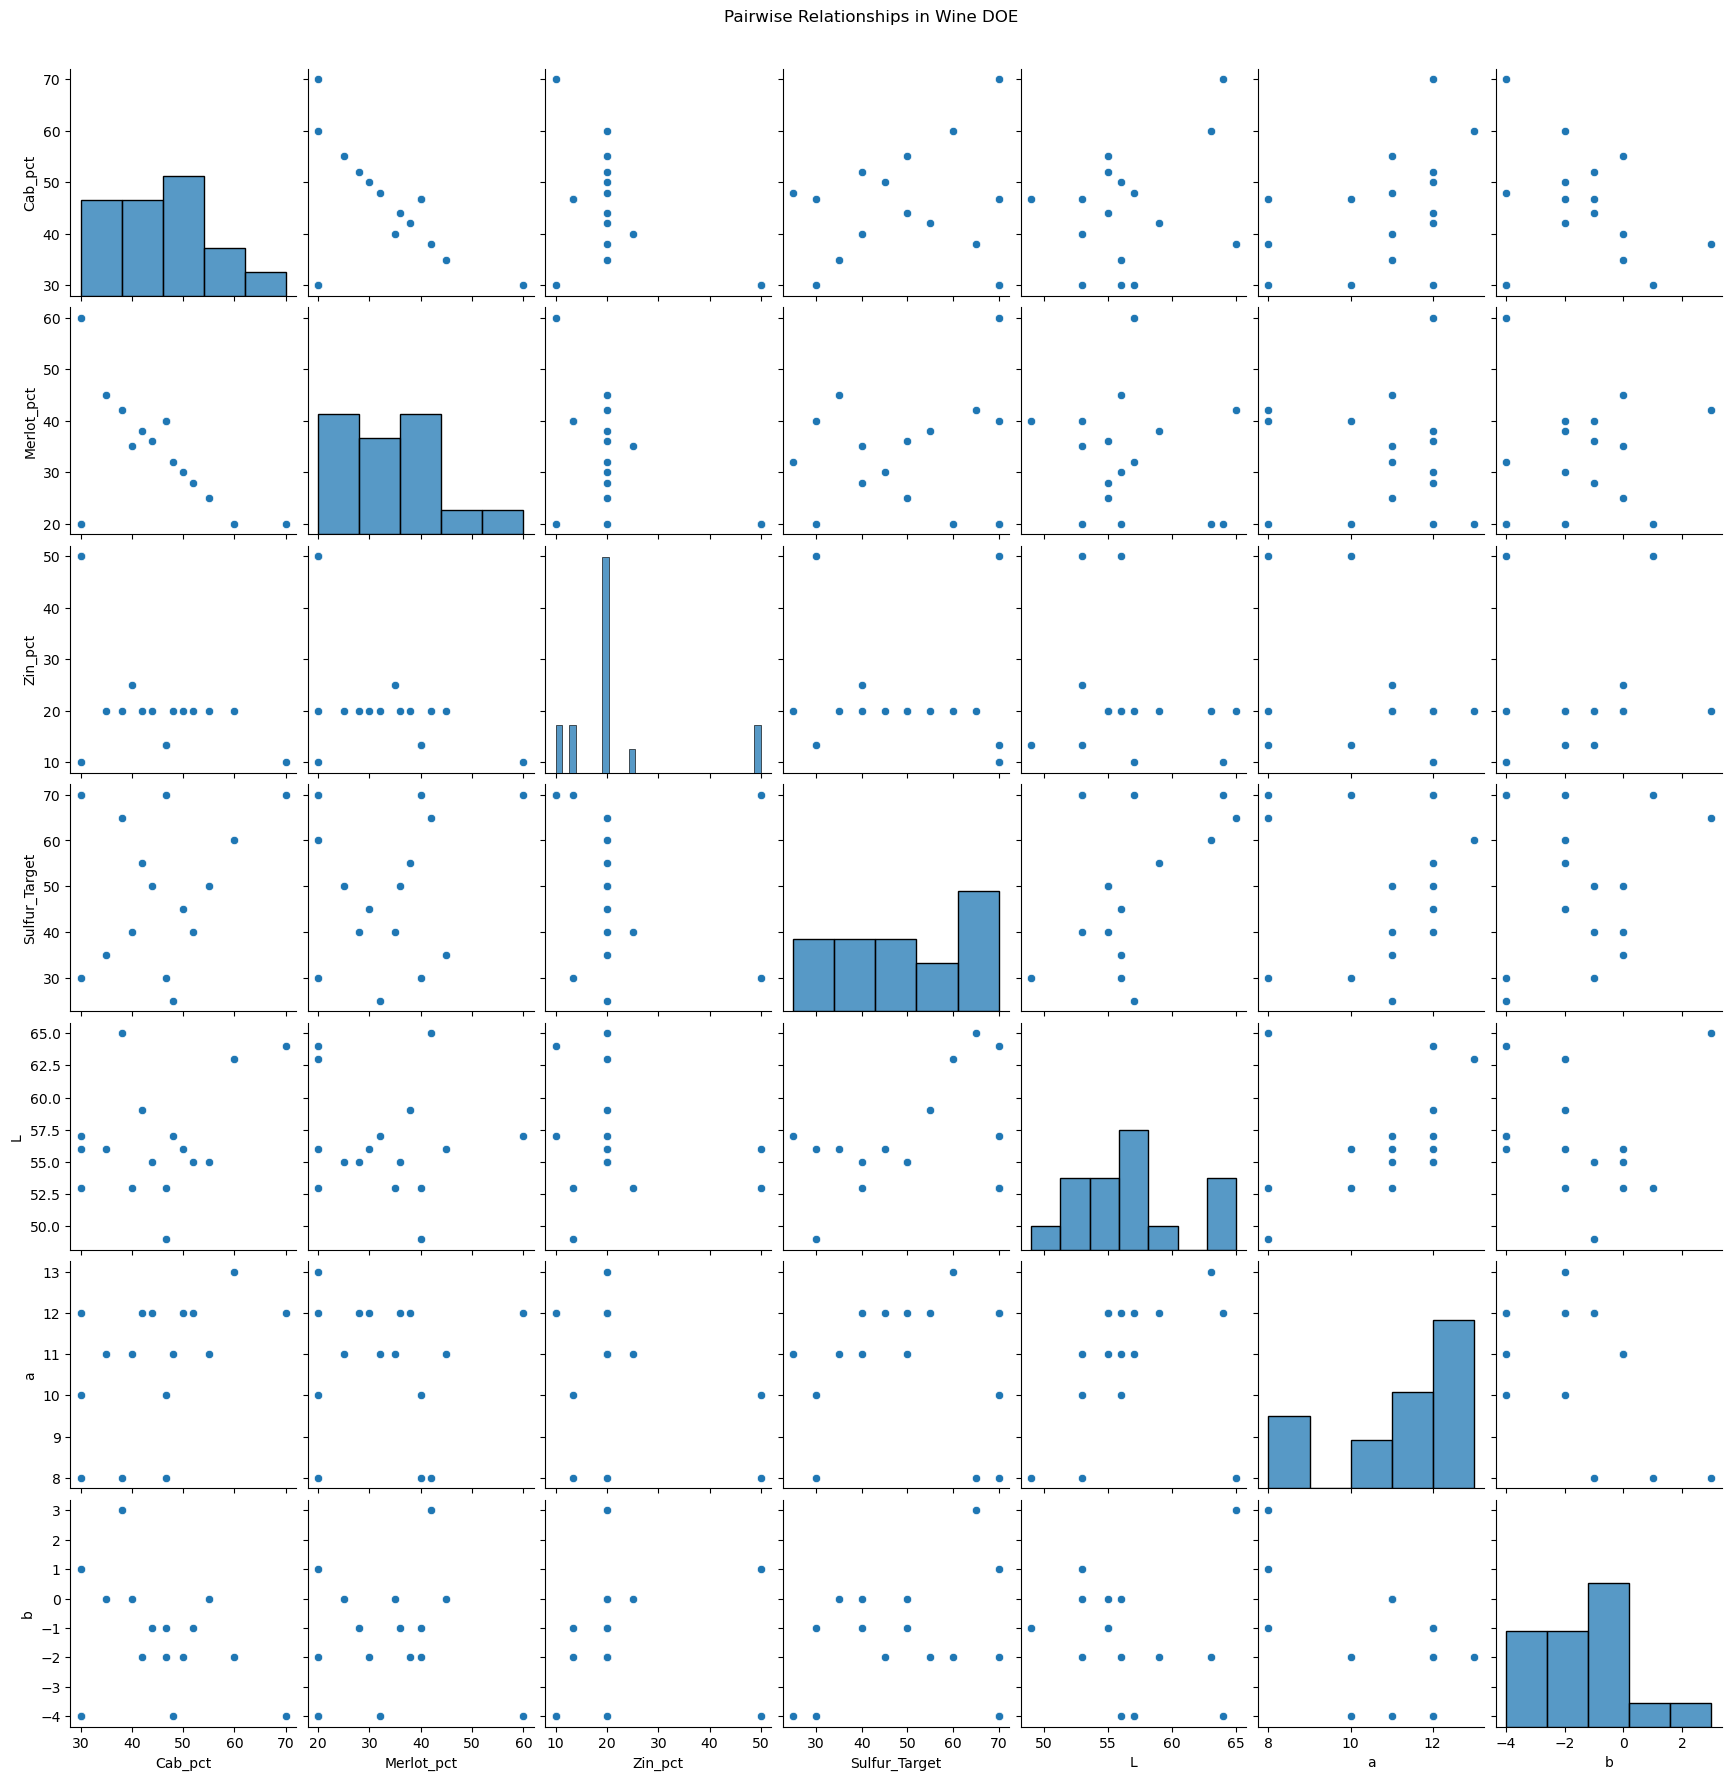

In [15]:
sns.pairplot(df[["Cab_pct","Merlot_pct","Zin_pct","Sulfur_Target","L","a","b"]])
plt.suptitle("Pairwise Relationships in Wine DOE", y=1.02)
plt.show()


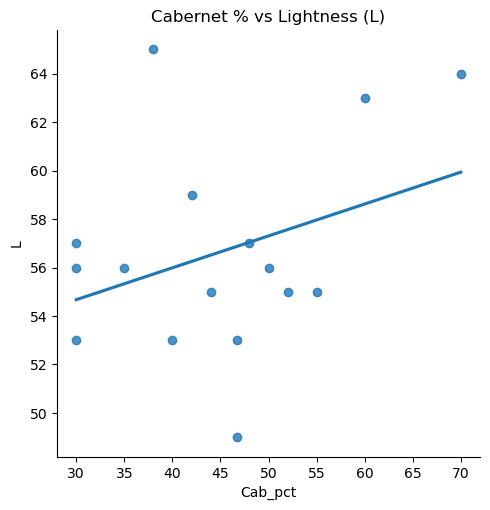

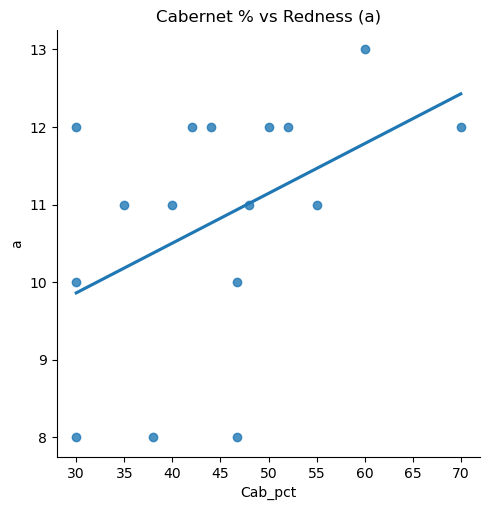

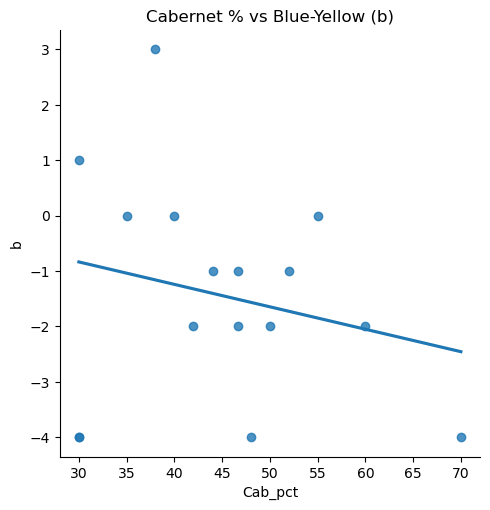

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lightness vs Cab %
sns.lmplot(data=df, x="Cab_pct", y="L", ci=None)
plt.title("Cabernet % vs Lightness (L)")
plt.show()

# Redness vs Cab %
sns.lmplot(data=df, x="Cab_pct", y="a", ci=None)
plt.title("Cabernet % vs Redness (a)")
plt.show()

# Blue-Yellow vs Cab %
sns.lmplot(data=df, x="Cab_pct", y="b", ci=None)
plt.title("Cabernet % vs Blue-Yellow (b)")
plt.show()


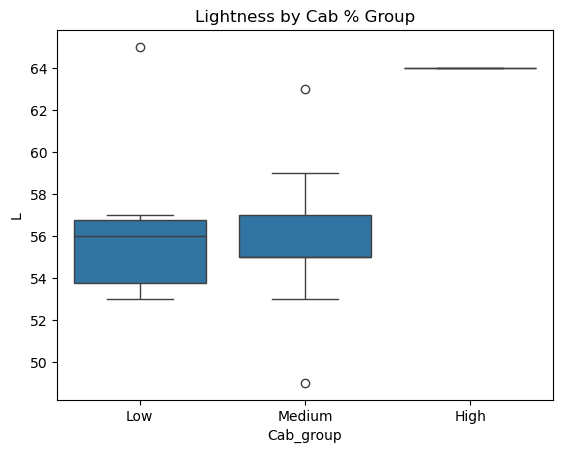

In [17]:
df['Cab_group'] = pd.cut(df['Cab_pct'], bins=[0,40,60,80], labels=["Low","Medium","High"])

sns.boxplot(data=df, x="Cab_group", y="L")
plt.title("Lightness by Cab % Group")
plt.show()


In [18]:
print(df[['Cab_pct','L','a','b']].corr())


          Cab_pct         L         a         b
Cab_pct  1.000000  0.343864  0.450695 -0.227850
L        0.343864  1.000000  0.308493 -0.051346
a        0.450695  0.308493  1.000000 -0.527361
b       -0.227850 -0.051346 -0.527361  1.000000


In [1]:
# Initialize Git (only once per project)
!git init

# Add your notebook file
!git add "doe app fun.ipynb"

# Commit with a message
!git commit -m "Add DOE notebook"

# Connect to your GitHub repo (replace with your repo URL)
!git remote add origin https://github.com/YourUsername/wine-doe-analysis.git

# Push to GitHub
!git branch -M main
!git push -u origin main


Reinitialized existing Git repository in C:/Users/srsch/.git/


[shipping_calculator_fixes 93e4c93] Add DOE notebook
 1 file changed, 434 insertions(+), 6 deletions(-)


error: remote origin already exists.
To https://github.com/srschnitz/Steel-proj.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/srschnitz/Steel-proj.git'
hint: Updates were rejected because the remote contains work that you do not
hint: have locally. This is usually caused by another repository pushing to
hint: the same ref. If you want to integrate the remote changes, use
hint: 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [3]:
import glob
print(glob.glob("*.ipynb"))


['differentformatplayfromlab.ipynb', 'doe app fun analysis.ipynb', 'doe app fun.ipynb', 'fixingmysteeldatasoitworks513.ipynb', 'gettingmyhumidity bins back.ipynb', 'IBMSQLPLAy.ipynb', 'lookingatdownloads.ipynb', 'majorcitiesair-Copy1.ipynb', 'majorcitiesair.ipynb', 'playingdownloaddata.ipynb', 'playingwithdata from class.ipynb', 'ready to analysis my steel data in notebook.ipynb', 'steelanalysiscontinue.ipynb', 'steeldatamodelsmainly.ipynb', 'steeldata_cleaning.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'Untitled6.ipynb', 'webscraping play.ipynb']
